In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step: 1 Load the Iris dataset
iris = load_iris()
iris
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# Check the data feature type and shape
print(type(iris.data))
print(iris.data.shape)
print(iris.data.dtype)

<class 'numpy.ndarray'>
(150, 4)
float64


In [4]:
# Check the target type and shape
print(type(iris.target))
print(iris.target.shape)
print(iris.target.dtype)

<class 'numpy.ndarray'>
(150,)
int64


In [5]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.DESCR)  

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.shape

(150, 4)

In [8]:
y = iris.target
y
y.shape

(150,)

In [9]:
# Step: 2 Explore the dataset
print("Dataset Shape:", X.shape)
print("Dataset Shape:", y.shape)
print("\nFeature Names:", iris.feature_names)
print("\nTarget Names:", iris.target_names)
print("\nFirst 5 rows of data:\n", X.head())

Dataset Shape: (150, 4)
Dataset Shape: (150,)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: ['setosa' 'versicolor' 'virginica']

First 5 rows of data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


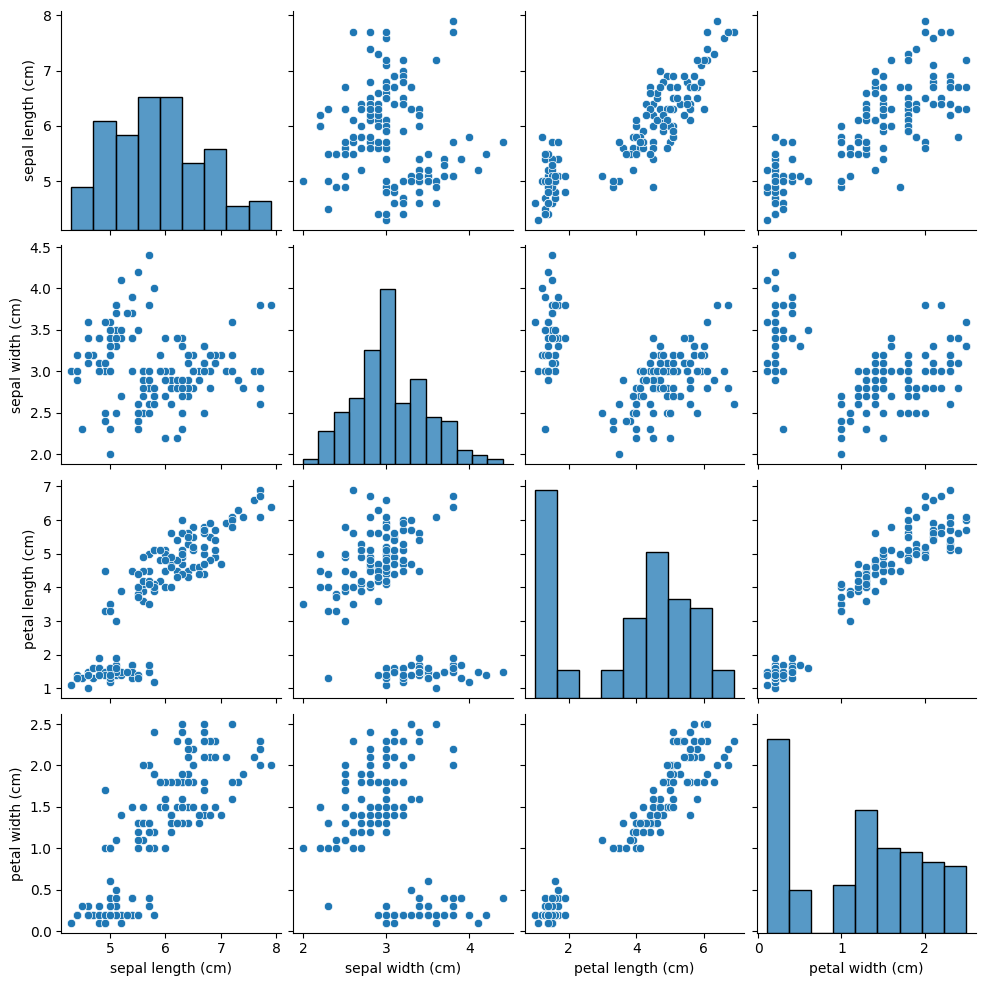

In [10]:
# Step 3: Visualize the dataset
sns.pairplot(X)
plt.show()

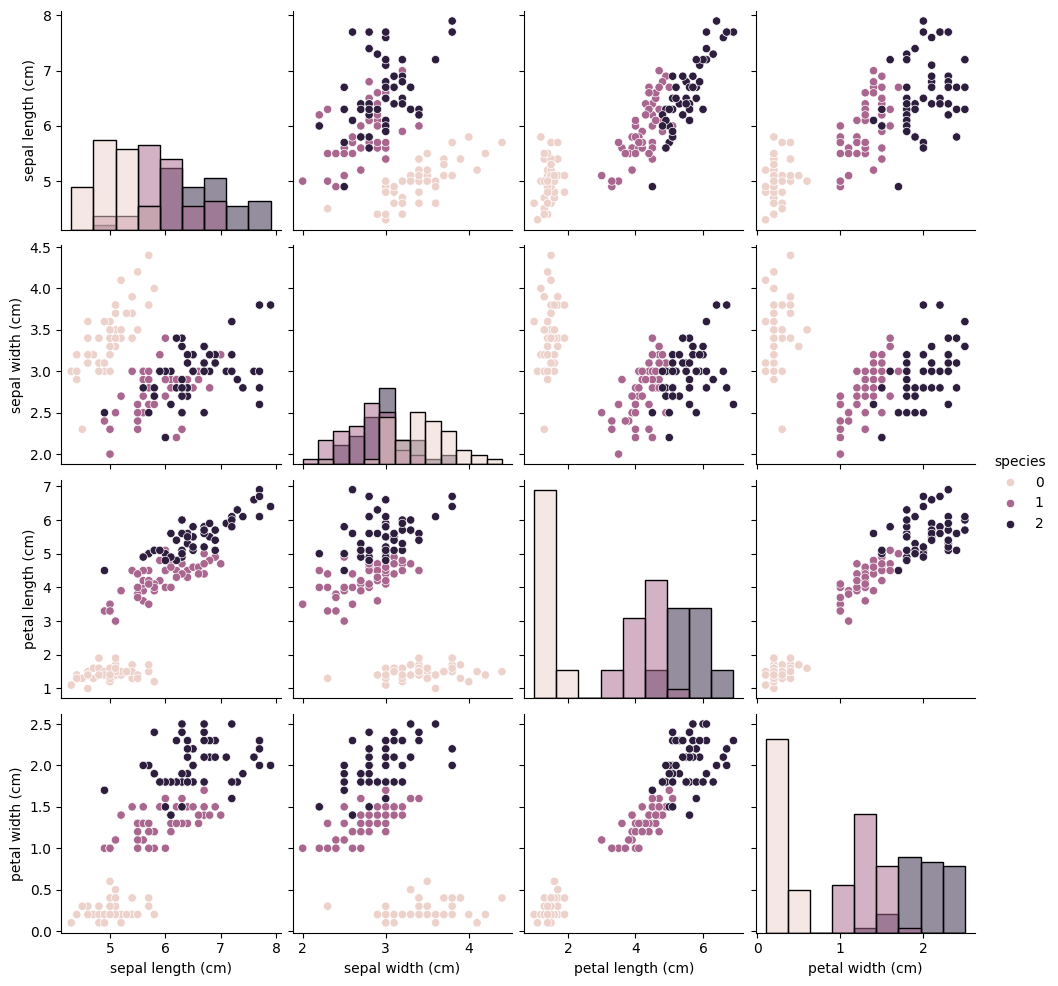

In [11]:
sns.pairplot(pd.concat([X, pd.Series(y, name = 'species')], axis = 1),
                       hue = 'species', diag_kind = 'hist')
plt.show()

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [14]:
# Preprocess the data (standardize features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make Prediction
y_pred = model.predict(X_test_scaled)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
classification_report = classification_report(y_test, y_pred,target_names= iris.target_names)
print("\nClassification report:", classification_report)


Accuracy: 1.0

Classification report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



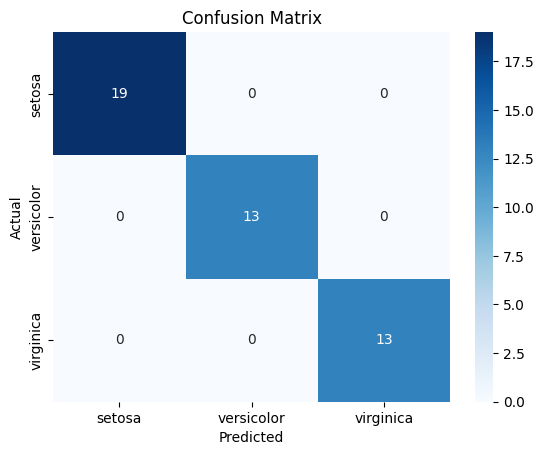

In [17]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

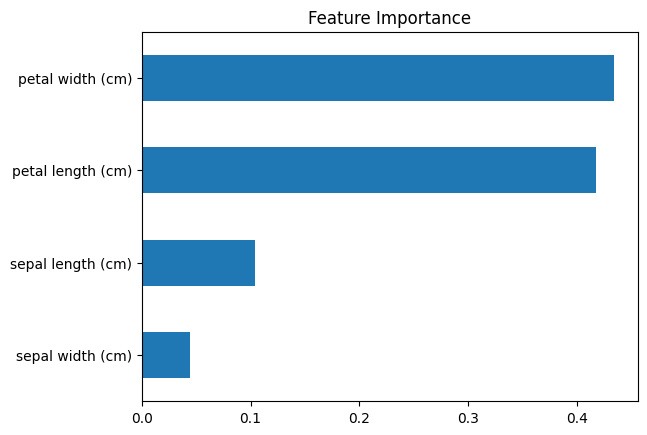

In [18]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=iris.feature_names)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

## Logistic Regression
Logistic Regression is a linear model used for binary and multiclass classification. For multiclass problems like iris, it uses
the one-vs-rest(OvR) or softmax(multinomial) approach to predict probabilities for each class. 

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

/Users/tejsharm/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# . Support Vector Machine (SVM)

Description: Support Vector Machine (SVM) with a kernel (e.g., linear, polynomial, or RBF) finds the optimal hyperplane to separate 
classes, maximizing the margin between them. For multiclass problems, it uses the one-vs-one or one-vs-rest strategy.

In [22]:
from sklearn.svm import SVC

In [23]:
model = SVC(kernel = 'rbf', probability=True)
model.fit(X_train_scaled, y_train)
model.predict(X_test_scaled)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Pros:

Effective for Non-Linear Data: The RBF kernel can capture complex, non-linear relationships, which is useful for distinguishing 
Versicolor and Virginica.

Robust to Outliers: SVM focuses on support vectors (data points near the decision boundary), making it less sensitive to outliers.
    
High Accuracy for Small Datasets: The Iris dataset’s small size (150 samples) is ideal for SVM, as it performs well with limited data.
Flexible with Kernels: We can experiment with different kernels (e.g., linear, polynomial, RBF) to find the best fit.

## Cons:

Computationally Intensive: SVMs can be slow to train on larger datasets or with complex kernels, though this is less of an issue for 
the small Iris dataset.
                                                                                                                                
Sensitive to Feature Scaling: Like Logistic Regression, SVM requires standardized features.
                                                                                                                                
Less Interpretable: SVMs do not provide straightforward feature importance scores, unlike Random Forest.
                                                                                                                                
Hyperparameter Tuning: Parameters like C (regularization) and gamma (for RBF kernel) require careful tuning to avoid overfitting or 
underfitting.
    

### KNeareast Neighbors
K-Nearest Neighbors (KNN)

Description: K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm that classifies a sample based on the
majority class of its k-nearest neighbors in the feature space.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)
model.predict(X_test_scaled)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Pros:

Non-Parametric: KNN makes no assumptions about the data distribution, making it versatile for the Iris dataset’s mixed separability.
Simple and Intuitive: Easy to understand and implement, as it relies on distance metrics (e.g., Euclidean distance).
Effective for Small Datasets: KNN performs well on small datasets like Iris, where the feature space is well-defined.
Adaptable to Non-Linear Data: KNN can capture complex decision boundaries without requiring a specific model structure.

### Cons:

Computationally Expensive at Prediction Time: KNN requires computing distances to all training samples for each prediction, which can be slow for large datasets (not a major issue for Iris).
Sensitive to Feature Scaling: Distance-based algorithms like KNN require standardized features.
Sensitive to k Value: The choice of k (number of neighbors) significantly affects performance and requires tuning.
No Feature Importance: KNN does not provide feature importance scores, limiting interpretability compared to Random Forest.
Sensitive to Noise: Outliers or noisy data can affect predictions, though the Iris dataset is clean.

### Considerations for Iris Dataset:

Experiment with different values of k (e.g., 3, 5, 7) using cross-validation to find the optimal number of neighbors.
The Iris dataset’s small size and clear feature differences make KNN a strong candidate for high accuracy.
Use the weights parameter (e.g., weights='distance') to give closer neighbors more influence, potentially improving performance.
Since KNN doesn’t provide feature importance, you can use permutation importance or other methods to analyze feature contributions.

### Decision Tree Classifier

Description: A Decision Tree Classifier builds a tree-like model of decisions based on feature thresholds, splitting the data to 
maximize class separation. It’s a simpler version of Random Forest, which ensembles multiple trees.

In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [16]:
model = DecisionTreeClassifier(max_depth=4, random_state = 42)
model.fit(X_train_scaled, y_train)
model.predict(X_test_scaled)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

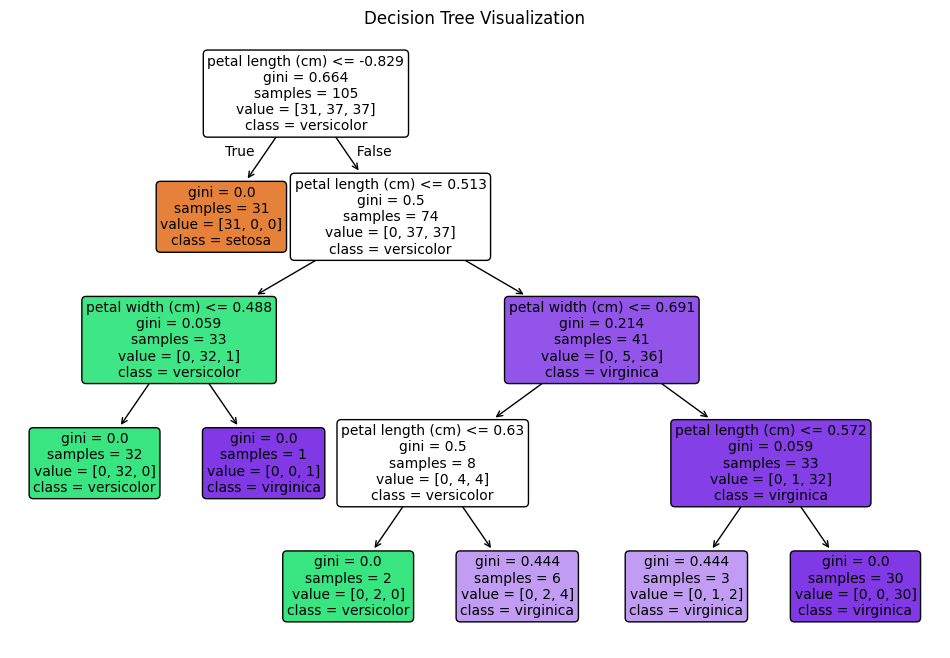

In [17]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=iris.feature_names,  # Optional: for better labels
          class_names=iris.target_names,    # Optional: for better labels
          filled=True,                      # Optional: fills nodes with color based on class
          rounded=True,                     # Optional: rounds node boxes
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Pros:

Interpretability: Decision Trees are easy to visualize and interpret, as you can plot the tree structure to see decision rules.
Feature Importance: Like Random Forest, Decision Trees provide feature importance scores, which can be visualized as in your script.
Handles Non-Linear Data: Decision Trees can capture non-linear relationships, suitable for the Iris dataset’s mixed separability.
No Feature Scaling Required: Unlike Logistic Regression, SVM, or KNN, Decision Trees are invariant to feature scaling, so you could skip StandardScaler (though it’s harmless to keep it).
Fast Training: Decision Trees are computationally efficient for small datasets like Iris.


### Cons:

Prone to Overfitting: Without constraints (e.g., max_depth), Decision Trees can overfit by creating overly complex trees, especially on small datasets.
Less Robust: A single Decision Tree is less robust than Random Forest, as it doesn’t average predictions across multiple trees.
Sensitive to Small Changes: Small changes in the data can lead to different tree structures, making it less stable.
Limited Generalization: Decision Trees may not generalize as well as ensemble methods like Random Forest on unseen data.
Considerations for Iris Dataset:

Use parameters like max_depth or min_samples_split to prevent overfitting, as the Iris dataset is small.
The Iris dataset’s clear feature differences (e.g., petal length and width) make Decision Trees effective, as they can identify simple decision rules.
Visualize the tree using sklearn.tree.plot_tree to understand the decision-making process.
Feature importance scores will be similar to Random Forest but based on a single tree, so they may be less reliable.

### Gradient Boosting Classifier (e.g., XGBoost, LightGBM, or CatBoost)

Description: Gradient Boosting builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous ones. Libraries like XGBoost, LightGBM, or CatBoost are optimized implementations of gradient boosting.

In [32]:
!pip install xgboost

In [31]:
from xgboost import XGBClassifier

# Replace RandomForestClassifier with XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate as before
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=iris.feature_names)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

ModuleNotFoundError: No module named 'xgboost'